# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
# we need to normailize the name of the bedroom
df['size']=df['size'].astype('str')

In [7]:
df['Bedroom']=df['size'].apply(lambda x: x.split(' ')[0])
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Bedroom
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [8]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
# some of the feature are not useful for our prediction model
drop_col=['availability','society','size','area_type']
df2=df.drop(drop_col,axis=1)
df2.head()

,location,total_sqft,bath,balcony,price,Bedroom
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [10]:
# pandas cannot view nan as null value, replace nan as np.nan
df2.replace('nan',np.nan,inplace=True)
df2.isnull().sum()

location        1
total_sqft      0
bath           73
balcony       609
price           0
Bedroom        16
dtype: int64

In [11]:
df2['balcony'].fillna(0,inplace=True)
df2['bath'].fillna(0,inplace=True)
df2['Bedroom'].fillna(0,inplace=True)

In [12]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedroom       0
dtype: int64

So we clear all the nan value, as some of the record can be replace by zero instead of showing nan

In [13]:
# change data type
def check_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [14]:
df2[~df2['total_sqft'].apply(check_float)].head(10)

,location,total_sqft,bath,balcony,price,Bedroom
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,0.0,0.0,192.000,4
81,Hennur Road,2957 - 3450,0.0,0.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,0.0,0.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


As some of the record show the range of the totoal sqft, we need to preprocess this type of data, so we can take a mean of the range

In [15]:
def convert(x):
  try:
    return float(x)
  except:
    a=x.split('-')
    if len(a) == 2:
      return (float(a[0]) + float(a[1])) / 2
    else:
      return None

In [16]:
df2['total_sqft']=df2['total_sqft'].apply(convert)

In [17]:
df2.iloc[30]

location      Yelahanka
total_sqft         2475
bath                  4
balcony               0
price               186
Bedroom               4
Name: 30, dtype: object

In [18]:
df2.dropna(inplace=True)
df2.isnull().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
Bedroom       0
dtype: int64

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13273 non-null  object 
 1   total_sqft  13273 non-null  float64
 2   bath        13273 non-null  float64
 3   balcony     13273 non-null  float64
 4   price       13273 non-null  float64
 5   Bedroom     13273 non-null  object 
dtypes: float64(4), object(2)
memory usage: 725.9+ KB


In [20]:
df2['Bedroom']=df2['Bedroom'].astype(int)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13273 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13273 non-null  object 
 1   total_sqft  13273 non-null  float64
 2   bath        13273 non-null  float64
 3   balcony     13273 non-null  float64
 4   price       13273 non-null  float64
 5   Bedroom     13273 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 725.9+ KB


In [22]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft']
df2.head()

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [23]:
df2['location']=df2['location'].apply(lambda x :x.strip())
df2['location'].value_counts()

Whitefield               539
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
M.G Road                   1
Satyasaibaba Layout        1
BEML Layout 5th Stage      1
Somanna Garden             1
KHB Colony Extension       1
Name: location, Length: 1288, dtype: int64

In [24]:
df2['location'].nunique()

1288

In [25]:
# so we got around 1300 different location in datatset, but we can group some of the location together
location_stat=df2['location'].value_counts()
location_stat[location_stat<=10].index

Index(['Naganathapura', 'Kalkere', 'Dodsworth Layout', 'Dairy Circle',
       'Sector 1 HSR Layout', 'Nagappa Reddy Layout', '1st Block Koramangala',
       'Nagadevanahalli', 'Sadashiva Nagar', 'Gunjur Palya',
       ...
       'Grihalakshmi Layout', 'Hullahalli', 'Indira Nagar 3rd Stage',
       'Sarvobhogam Nagar', 'Kengeri Satellite Town Stage II', 'M.G Road',
       'Satyasaibaba Layout', 'BEML Layout 5th Stage', 'Somanna Garden',
       'KHB Colony Extension'],
      dtype='object', length=1048)

In [26]:
# we got 1048 locations that are frequency less than or equal to 10, so we can group these location into one category

df2['location']=df2['location'].apply(lambda x:'Other' if x in location_stat[location_stat<=10].index else x)

In [27]:
df2.location.nunique()

241

So we reduce the number of categories from 1288 to 241

# Data Cleaning



Z-score outlier handling

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [28]:
#drop= True will drop the index column

df2.reset_index(drop=True,inplace=True)

In [29]:
#numpy.any() returns True if at least one element in a NumPy array evaluates to True
#numpy.all() returns True only if all elements in a NumPy array evaluate to True.

def z_score_out(df,column):
  outlier=df[column][np.any([stats.zscore(df[column])>3,stats.zscore(df[column])<-3],axis=0)]
  out_index=outlier.index
  df=df.drop(out_index,axis=0)
  return df.reset_index(drop=True)

In [30]:
z_clean=z_score_out(df2,'price_per_sqft')
z_clean=z_score_out(z_clean,'Bedroom')
z_clean

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
12998,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
12999,Other,3600.0,5.0,0.0,400.00,4,11111.111111
13000,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13001,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


In [31]:
pps_Q3=df2.price_per_sqft.quantile(0.75)
pps_Q1=df2.price_per_sqft.quantile(0.25)
IQR=pps_Q3-pps_Q1

In [32]:
IQR

3045.1612903225805

In [33]:
# less than (Q1-1.5*IQR) or greater than (Q3+1.5*IQR) would be consider to outliers

# And we got 1268 record are outliers
df2[(df2.price_per_sqft<(pps_Q1-1.5*IQR)) | (df2.price_per_sqft>(pps_Q3+1.5*IQR))]

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
7,Rajaji Nagar,3300.0,4.0,0.0,600.0,4,18181.818182
9,Other,1020.0,6.0,0.0,370.0,6,36274.509804
22,Thanisandra,2800.0,5.0,2.0,380.0,4,13571.428571
45,HSR Layout,600.0,9.0,0.0,200.0,8,33333.333333
48,KR Puram,800.0,1.0,1.0,130.0,2,16250.000000
...,...,...,...,...,...,...,...
13215,Other,1140.0,1.0,1.0,185.0,2,16228.070175
13230,Other,1400.0,7.0,0.0,218.0,7,15571.428571
13258,Hulimavu,500.0,1.0,3.0,220.0,1,44000.000000
13259,Other,1200.0,5.0,0.0,325.0,4,27083.333333


IQR method for outlier detection

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

In [34]:
def outliers(df2,column):
  Q3=df2[column].quantile(0.75)
  Q1=df2[column].quantile(0.25)
  IQR=Q3-Q1
  outliers=df2[(df2[column]<(Q1-1.5*IQR)) | (df2[column]>(Q3+1.5*IQR))]
  return df2.drop(outliers.index,axis=0)

In [35]:
outliers(df2,'price_per_sqft').head(10)

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,0.0,204.00,4,7467.057101
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4,10592.459605


In [36]:
df2.bath.quantile(0.25)

2.0

In [37]:
clean_df=outliers(df2,'price_per_sqft')
clean_df=outliers(clean_df,'bath')
clean_df=outliers(clean_df,'Bedroom')

In [38]:
df.Bedroom.unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', 'nan', '27',
       '10', '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [39]:
clean_df.head()

,location,total_sqft,bath,balcony,price,Bedroom,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248


In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11218 entries, 0 to 13272
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        11218 non-null  object 
 1   total_sqft      11218 non-null  float64
 2   bath            11218 non-null  float64
 3   balcony         11218 non-null  float64
 4   price           11218 non-null  float64
 5   Bedroom         11218 non-null  int64  
 6   price_per_sqft  11218 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 701.1+ KB


In [41]:
clean_df=clean_df.reset_index(drop=True)

# EDA

In [44]:
df.groupby('area_type')['price'].mean()

area_type
Built-up  Area          104.285498
Carpet  Area             89.502356
Plot  Area              208.495486
Super built-up  Area     92.971757
Name: price, dtype: float64

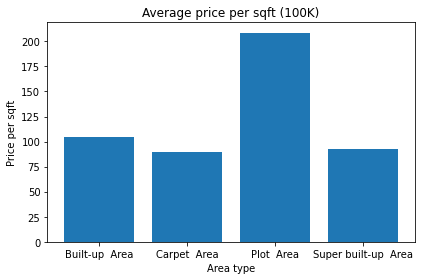

In [46]:
plt.bar(df.groupby('area_type')['price'].mean().keys(),df.groupby('area_type')['price'].mean().values)
plt.title('Average price per sqft (100K)')
plt.ylabel('Price per sqft')
plt.xlabel('Area type')
plt.tight_layout()

In [47]:
def plot_scatter_chart(df,location):
    '''
    Function that will help us to visualize the data of the different locations 
    '''
    bed_2 = df[(df.location==location) & (df.Bedroom==2)]
    bed_3 = df[(df.location==location) & (df.Bedroom==3)]
    plt.rcParams['figure.figsize'] = (12, 8)
    plt.scatter(bed_2.total_sqft, bed_2.price,color='blue', label='2 BHK', s=50)
    plt.scatter(bed_3.total_sqft, bed_3.price,marker='+',color='green', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()

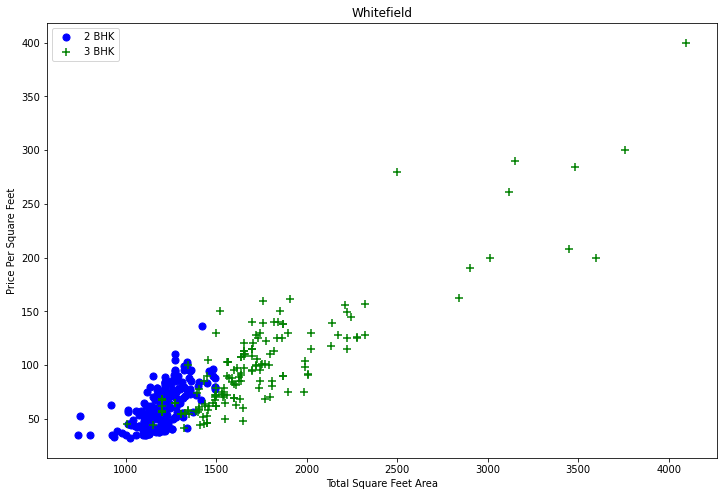

In [48]:
plot_scatter_chart(clean_df,'Whitefield')

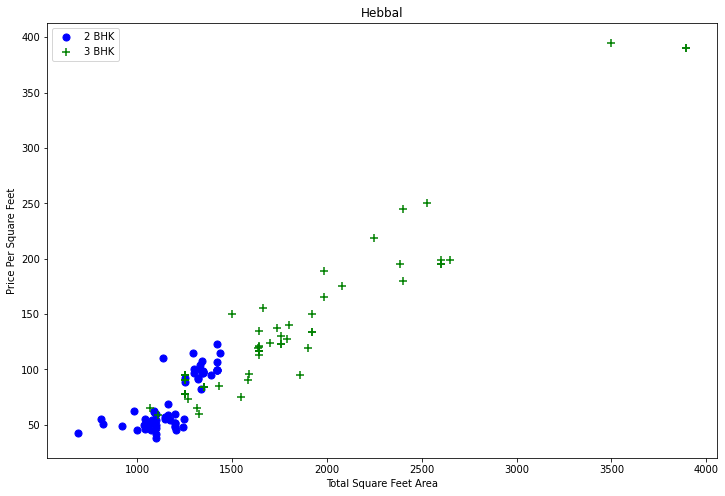

In [49]:
plot_scatter_chart(clean_df,"Hebbal")

# Model preparation

In [50]:
location_dummies=pd.get_dummies(z_clean.location)

In [51]:
model_df=z_clean.drop(['location','price','price_per_sqft'],axis=1)
model_df.head()

,total_sqft,bath,balcony,Bedroom
0,1056.0,2.0,1.0,2
1,2600.0,5.0,3.0,4
2,1440.0,2.0,3.0,3
3,1521.0,3.0,1.0,3
4,1200.0,2.0,1.0,2


In [52]:
x=pd.concat([model_df,location_dummies],axis=1)
y=z_clean.price

In [53]:
print(x.shape)
print(y.shape)

(13003, 245)
(13003,)


In [54]:
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [56]:
scale=MinMaxScaler()
scale_xtrain=scale.fit_transform(x_train)
scale_xtest=scale.transform(x_test)

In [57]:
# try linear regression

linear_model=LinearRegression()
linear_model.fit(scale_xtrain,y_train)
linear_model.score(scale_xtest,y_test)

0.5102092197105172

In [58]:
def find_best_model_using_gridsearchcv(X,y):
    '''
    Function to try different models at once of the data with different parameters to find the best ones.
    '''
    algos = {'linear_regression':{'model': LinearRegression(),'params':{'normalize':[True,False]}},
        'lasso':{'model': Lasso(),'params':{'alpha' : [1,2],'selection':['random','cyclic']}},
        'decision_tree':{'model': DecisionTreeRegressor(),'params':{'criterion':['mse','friedman_mse'],'splitter':['best','random']}}}
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.3,random_state=0)
    for algo_name, config in algos.items():
      # GridSearchCV is the main focus as it helps to try out the different parameters for the different models.
      gs = GridSearchCV(config['model'],config['params'], cv=cv, return_train_score=False)
      gs.fit(X,y)
      scores.append({'model': algo_name,'best_score':np.round(gs.best_score_,2),'best_params':gs.best_params_})
      # At last binding the results of the models with best params. into a DataFrame.
      
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])  

In [59]:
find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.45,{'normalize': True}
1,lasso,0.41,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.43,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
